In [1]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
X_test = np.load(r"D:\Programming\tb-scan-ai\model\X_test.npy")
y_test = np.load(r"D:\Programming\tb-scan-ai\model\y_test.npy")
model = load_model(r"D:\Programming\tb-scan-ai\model\xception_tb_model.h5")
print(X_test.shape)

if X_test.shape[-1] == 1:
    X_test_rgb = np.repeat(X_test, 3, axis=-1)
else:
    X_test_rgb = X_test


(752, 299, 299, 1)


In [8]:
y_pred = model.predict(X_test_rgb)
y_pred_labels = (y_pred > 0.5).astype(int).flatten()

24/24 ━━━━━━━━━━━━━━━━━━━━ 133s 5s/step


In [9]:
# Evaluate
print("Classification Report:\n", classification_report(y_test, y_pred_labels))
conf_mat = confusion_matrix(y_test, y_pred_labels)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       587
           1       0.91      0.88      0.89       165

    accuracy                           0.95       752
   macro avg       0.94      0.93      0.93       752
weighted avg       0.95      0.95      0.95       752



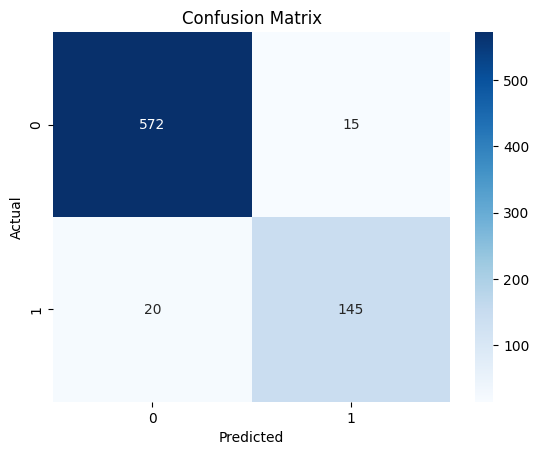

In [10]:
# Plot
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()